In [58]:
import sympy as sym
sym.init_printing()

import numpy as np
from math import pi

import matplotlib.pyplot as plt
from sympy import I, Matrix, symbols
from sympy.physics.quantum import TensorProduct, Dagger
import scipy.optimize

import scipy.constants as const
#import qutip

from matplotlib.colors import Normalize as Norm

%load_ext cython

ModuleNotFoundError: No module named 'math.isclose'; 'math' is not a package

NameError: name 'isclose' is not defined

In [2]:
def spre(m):
    return TensorProduct(sym.eye(m.shape[0]),m)

def spost(m):
    return TensorProduct(m.T, sym.eye(m.shape[0]))

def collapse(c):
    tmp = Dagger(c)*c/2
    return spre(c)*spost(Dagger(c))-spre(tmp)-spost(tmp)


s13=Matrix([[0,0,1],[0,0,0],[0,0,0]])
s23=Matrix([[0,0,0],[0,0,1],[0,0,0]])
s12=Matrix([[0,1,0],[0,0,0],[0,0,0]])

s31=s13.T
s32=s23.T
s21=s12.T

s11 = s12*s21
s22 = s21*s12
s33 = s31*s13


In [3]:
delta2,delta3=sym.symbols('delta_2 delta_3', real=True)
gamma13,gamma23,gamma2d,gamma3d,nbath,gammamu=sym.symbols('gamma_13 gamma_23 gamma_2d gamma_3d n_b gamma_mu', real=True, negative=False)
omegao, omegam=sym.symbols('Omega_o Omega_mu', real=True, negative=False)
rho11, rho12, rho13, rho21, rho22, rho23, rho31, rho32, rho33=sym.symbols('rho_11 rho_12 rho_13 rho_21 rho_22 rho_23 rho_31 rho_32 rho_33')

a= sym.symbols('a')
ar,ai=sym.symbols('a_r a_i', real=True)
g=sym.symbols('g',real=True, negative=False)
lam=sym.symbols('lambda')

In [4]:
H=omegam*s21+omegao*s32+ g*a*s31
H=H+Dagger(H)
H=H+delta2*s22+delta3*s33

H_no_a=H[:,:]
H_no_a[0,2]=0
H_no_a[2,0]=0
H_no_a

H_o=H_no_a[:,:]
H_o[0,1]=0
H_o[1,0]=0

H_mu=H_no_a[:,:]
H_mu[2,1]=0
H_mu[1,2]=0


H, H_no_a, H_o, H_mu

⎛⎡            _⎤                                             ⎞
⎜⎢ 0   Ωₘᵤ  g⋅a⎥  ⎡ 0   Ωₘᵤ  0 ⎤  ⎡0  0   0 ⎤  ⎡ 0   Ωₘᵤ  0 ⎤⎟
⎜⎢             ⎥  ⎢            ⎥  ⎢         ⎥  ⎢            ⎥⎟
⎜⎢Ωₘᵤ  δ₂   Ωₒ ⎥, ⎢Ωₘᵤ  δ₂   Ωₒ⎥, ⎢0  δ₂  Ωₒ⎥, ⎢Ωₘᵤ  δ₂   0 ⎥⎟
⎜⎢             ⎥  ⎢            ⎥  ⎢         ⎥  ⎢            ⎥⎟
⎝⎣a⋅g  Ωₒ   δ₃ ⎦  ⎣ 0   Ωₒ   δ₃⎦  ⎣0  Ωₒ  δ₃⎦  ⎣ 0    0   δ₃⎦⎠

In [5]:
aval=0
gamma13val=1./22e-3
gamma23val=1./22e-3
gamma2dval=1./1e-6
gamma3dval=1./1e-6
nbathval=20
gammamuval=1./((nbath+1)*11e-3)
omegaoval=1e3
omegamval=10e6
gval=0
ndelta2=501
ndelta3=501
delta2vals=np.linspace(-40e6,40e6,ndelta2)
delta3vals=np.linspace(-40e6,40e6,ndelta3)

In [6]:
def dressed_states(del3_vals,omegam_val, omegao_val):
    ndel3=len(del3_vals)
    H_disc_diff=sym.diff(sym.discriminant(sym.det(H_no_a-lam*sym.eye(3)),lam),delta2)
    delta2_disc_fun= sym.lambdify((delta3, omegam,omegao),(sym.solve(H_disc_diff,delta2)))
    del2_vals=np.zeros(ndel3)
    for ii in range(ndel3):
        del2_vals[ii]=delta2_disc_fun(del3_vals[ii],omegam_val,omegao_val)[2]
    #del2_vals[ii]=delta2_disc_fun(del3_vals)
    return del2_vals

In [7]:
#def dressed_states(delta2vals, omegamval, omegaoval):
H_disc=sym.discriminant(sym.det(H_no_a-lam*sym.eye(3)),lam)
H_disc_diff=sym.diff(H_disc,delta2)
delta2_ds_sym=sym.solve(H_disc_diff,delta2)
delta2_ds_fun=sym.lambdify((delta3,omegam, omegao),delta2_ds_sym)
delta2_ds_vals=delta2_ds_fun(delta3vals, omegamval,omegaoval)

/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in subtract
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in add
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in sqrt
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in power
  """


In [8]:
def dressed_states_1(delta3vals,omegamval,omegaoval):
    H_disc=sym.discriminant(sym.det(H_no_a-lam*sym.eye(3)),lam)
    H_disc_diff=sym.diff(H_disc,delta2)
    delta2_ds_sym=sym.solve(H_disc_diff,delta2)
    delta2_ds_fun=sym.lambdify((delta3,omegam, omegao),delta2_ds_sym)
    delta2_ds_vals=delta2_ds_fun(delta3vals, omegamval,omegaoval)
    return delta2_ds_vals

In [9]:
type(delta2_ds_vals)

list

In [10]:
def H_disc_fun(delta2vals,delta3vals, omegamval, omegaoval):
    H_disc_sym=sym.lambdify((delta2,delta3, omegam, omegao),sym.discriminant(sym.det(H_no_a-lam*sym.eye(3)),lam))
    H_disc_vals=np.zeros((len(delta2vals),len(delta3vals)))
    for ii in range(len(delta2vals)):
        for jj in range(len(delta3vals)):
            H_disc_vals[ii,jj]=H_disc_sym(delta2vals[ii],delta3vals[jj], omegamval,omegaoval)
            
    return H_disc_vals

In [190]:
def H_disc_diff_fun(delta2vals,delta3vals, omegamval, omegaoval):
    H_disc=sym.discriminant(sym.det(H_no_a-lam*sym.eye(3)),lam)
    H_disc_diff_sym=sym.lambdify((delta2,delta3, omegam, omegao),sym.diff(H_disc,delta2))
    H_disc_diff_vals=np.zeros((len(delta2vals),len(delta3vals)))
    for ii in range(len(delta2vals)):
        for jj in range(len(delta3vals)):
            H_disc_diff_vals[ii,jj]=H_disc_diff_sym(delta2vals[ii],delta3vals[jj], omegamval,omegaoval)
            
    return H_disc_vals

In [155]:
H_disc_vals=H_disc_fun(delta2vals, delta3vals, omegamval, omegaoval)
min_inds=np.argmin(H_disc_vals, 0)
delta2_disc_vals_min=delta2vals[min_inds]
delta2_dressed=dressed_states(delta3vals, omegamval, omegaoval)

/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in sqrt
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [156]:
delta2_dressed=dressed_states(delta3vals, omegamval, omegaoval)

/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in sqrt
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [11]:
plt.plot(-delta3vals,delta2_disc_vals_min)
plt.plot(-delta3vals, delta2_dressed)
plt.plot(-delta3vals, delta2_ds_vals[1])
plt.legend(['H disc min', 'dressed','pls'])

NameError: name 'delta2_disc_vals_min' is not defined

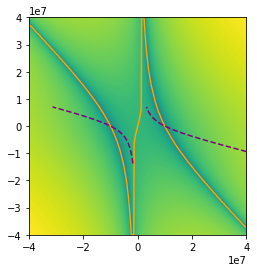

In [179]:
fig, ax= plt.subplots()
ax.imshow(np.log10(np.abs(H_disc_vals)),extent=[np.min(delta3vals), np.max(delta3vals),np.min(delta2vals), np.max(delta2vals)])
ax.plot(-delta3vals, delta2_disc_vals_min, color='orange')
ax.plot(-delta3vals, delta2_dressed,'--', color='purple')
#ax.plot(delta3vals, delta2_ds_old)
#ax.plot(delta2_ds_new,-delta3vals)

In [96]:
lam

/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in sqrt
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in sqrt
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """


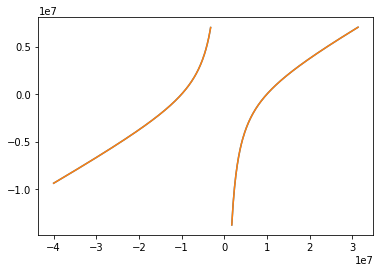

In [157]:
delta2_ds_old=dressed_states(delta3vals, omegamval, omegaoval)
delta2_ds_new= dressed_states(delta3vals, omegamval, omegaoval)
plt.plot(delta3vals, delta2_ds_old)
plt.plot(delta3vals, delta2_ds_new)

In [191]:
H_disc_diff_vals=H_disc_diff_fun(delta2vals,delta3vals, omegamval, omegaoval)

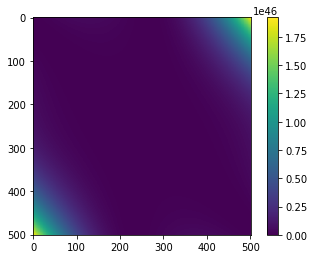

In [192]:
plt.imshow(H_disc_diff_vals)
plt.colorbar()

/home/peter/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


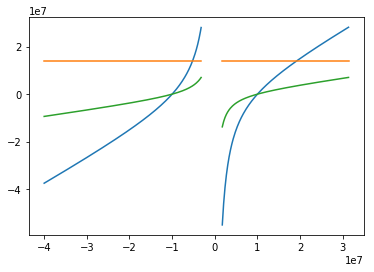

In [173]:
plt.plot(delta3vals, delta2_ds_test[0])
plt.plot(delta3vals, np.abs(delta2_ds_test[1]))
plt.plot(delta3vals, delta2_ds_test[2])

In [169]:
delta2_ds_test[1]

array([ -9375000.06213236+10588171.45990892j,
        -9332490.02217094+10625659.08635787j,
        -9289959.7399512 +10662863.08022187j,
        -9247408.96961575+10699786.37124318j,
        -9204837.46130951+10736431.82610446j,
        -9162244.96109813+10772802.25023828j,
        -9119631.21088441+10808900.38956823j,
        -9076995.94832264+10844728.93218482j,
        -9034338.90673079+10880290.50995872j,
        -8991659.81500062+10915587.70009456j,
        -8948958.39750537+10950623.02662757j,
        -8906234.37400531+10985398.96186573j,
        -8863487.45955078+11019917.92777961j,
        -8820717.36438287+11054182.29734238j,
        -8777923.79383148+11088194.39582183j,
        -8735106.44821083+11121956.50202657j,
        -8692265.02271236+11155470.84950834j,
        -8649399.20729469+11188739.62772208j,
        -8606508.68657093+11221764.98314563j,
        -8563593.13969295+11254549.02036069j,
        -8520652.24023261+11287093.80309646j,
        -8477685.65606003+11319401

/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in sqrt
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in subtract
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in add
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in sqrt
  """
/home/peter/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeW

<Figure size 960x960 with 0 Axes>

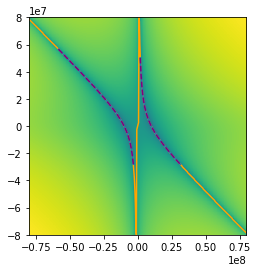

<Figure size 960x960 with 0 Axes>

In [141]:
aval=0
gamma13val=1./22e-3
gamma23val=1./22e-3
gamma2dval=1./1e-6
gamma3dval=1./1e-6
nbathval=20
gammamuval=1./((nbath+1)*11e-3)
omegaoval=1e3
omegamval=1e7
gval=0
ndelta2=501
ndelta3=501
delta2vals=np.linspace(-80e6,80e6,ndelta2)
delta3vals=np.linspace(-80e6,80e6,ndelta3)
def dressed_states(del3_vals,omegam_val, omegao_val):
    ndel3=len(del3_vals)
    H_disc_diff=sym.diff(sym.discriminant(sym.det(H_no_a-lam*sym.eye(3)),lam),delta2)
    delta2_disc_fun= sym.lambdify((delta3, omegam,omegao),(sym.solve(H_disc_diff,delta2)))
    del2_vals=np.zeros(ndel3)
    for ii in range(ndel3):
        del2_vals[ii]=delta2_disc_fun(del3_vals[ii],omegam_val,omegao_val)[0]
    #del2_vals[ii]=delta2_disc_fun(del3_vals)
    return del2_vals
def dressed_states_2(delta3vals,omegamval,omegaoval):
    H_disc=sym.discriminant(sym.det(H_no_a-lam*sym.eye(3)),lam)
    H_disc_diff=sym.diff(H_disc,delta2)
    delta2_ds_sym=sym.solve(H_disc_diff,delta2)
    delta2_ds_fun=sym.lambdify((delta3,omegam, omegao),delta2_ds_sym)
    delta2_ds_vals=delta2_ds_fun(delta3vals, omegamval,omegaoval)
    return delta2_ds_vals
def dressed_states_3(delta3vals,omegamval,omegaoval):
    H_disc=sym.discriminant(sym.det(H_no_a-lam*sym.eye(3)),lam)
    H_disc_fun=sym.lambdify((delta2,delta3, omegam, omegao), H_disc)
    H_disc_diff=sym.diff(H_disc,delta2)
    H_disc_diff_fun=sym.lambdify((delta2,delta3, omegam, omegao), H_disc_diff)
    delta2_ds_vals=np.zeros(len(delta3vals))
    delta3min=np.min(delta3vals)
    delta3max=np.max(delta3vals)
    for ii in range(len(delta3vals)):
        try:
            delta2_ds_vals[ii]=scipy.optimize.brentq(H_disc_diff_fun,delta3min, delta3max,
                                                 args=(delta3vals[ii], omegamval, omegaoval))
            #if np.abs(H_disc_fun(delta2_ds_vals[ii],delta3vals[ii], omegamval, omegaoval))>1e36:
             #   delta2_ds_vals[ii]=np.nan
        except ValueError:
            delta2_ds_vals[ii]= np.nan
    return delta2_ds_vals
def dressed_states_4(delta3vals,omegamval,omegaoval):
    H_disc=sym.discriminant(sym.det(H_no_a-lam*sym.eye(3)),lam)
    H_disc_fun=sym.lambdify((delta2,delta3, omegam, omegao), H_disc)
    H_disc_diff=sym.diff(H_disc,delta2)
    H_disc_diff_fun=sym.lambdify((delta2,delta3, omegam, omegao), H_disc_diff)
    delta2_ds_vals=np.zeros(len(delta3vals))
    delta3min=np.min(delta3vals)
    delta3max=np.max(delta3vals)
    for ii in range(len(delta3vals)):
        try:
            delta2_ds_vals[ii]=scipy.optimize.fsolve(H_disc_diff_fun,omegaoval**2/delta3vals[ii],
                                                 args=(delta3vals[ii], omegamval, omegaoval))
            #if np.abs(H_disc_fun(delta2_ds_vals[ii],delta3vals[ii], omegamval, omegaoval))>1e36:
             #   delta2_ds_vals[ii]=np.nan
        except ValueError:
            delta2_ds_vals[ii]= np.nan
    return delta2_ds_vals
def H_disc_fun(delta2vals,delta3vals, omegamval, omegaoval):
    H_disc_sym=sym.lambdify((delta2,delta3, omegam, omegao),sym.discriminant(sym.det(H_no_a-lam*sym.eye(3)),lam))
    H_disc_vals=np.zeros((len(delta2vals),len(delta3vals)))
    for ii in range(len(delta2vals)):
        for jj in range(len(delta3vals)):
            H_disc_vals[ii,jj]=H_disc_sym(delta2vals[ii],delta3vals[jj], omegamval,omegaoval)        
    return H_disc_vals

delta2_ds1=dressed_states(delta3vals, omegamval, omegaoval)
delta2_ds2=dressed_states_2(delta3vals, omegamval, omegaoval)
delta2_ds3=dressed_states_3(delta3vals, omegamval, omegaoval)
delta2_ds4=dressed_states_4(delta3vals, omegamval, omegaoval)

H_disc_vals=H_disc_fun(delta2vals, delta3vals, omegamval, omegaoval)
delta2_min=delta2vals[np.argmin(H_disc_vals,0)]

fig=plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')

fig, ax =plt.subplots()
fig=plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')

ax.imshow(np.log10(np.abs(H_disc_vals)),extent=[np.min(delta3vals), np.max(delta3vals),np.min(delta2vals), np.max(delta2vals)])
ax.plot(delta3vals, -delta2_min,color='orange')
ax.plot(delta3vals,-delta2_ds1)
ax.plot(delta3vals,-delta2_ds2[0],'--', color='purple')

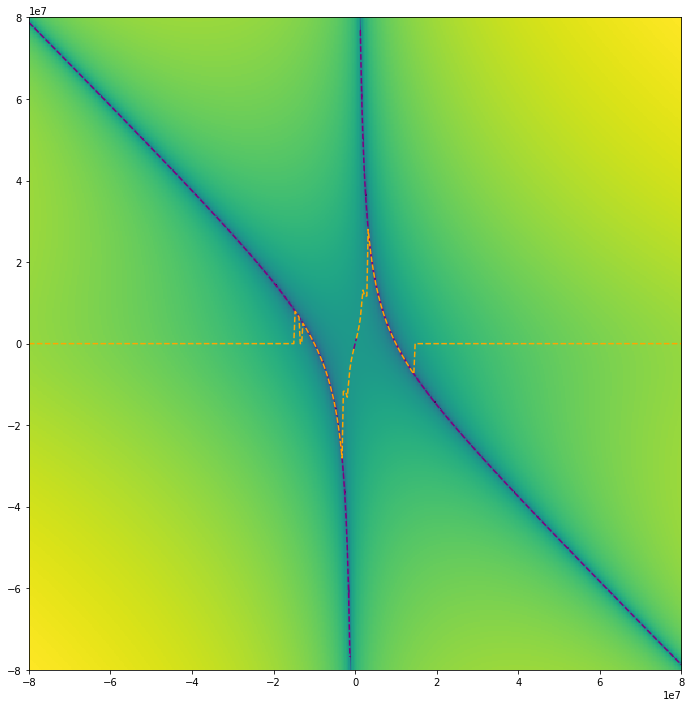

In [142]:
fig, ax =plt.subplots(1,1, figsize=(12,12))

ax.imshow(np.log10(np.abs(H_disc_vals)),extent=[np.min(delta3vals), np.max(delta3vals),np.min(delta2vals), np.max(delta2vals)])
ax.plot(delta3vals,-delta2_ds3,'--', color='purple')
ax.plot(delta3vals,-delta2_ds4,'--', color='orange')

#ax.plot(delta3vals,-omegaoval**2/delta2vals,color='orange')
plt.ylim([np.min(delta3vals),max(delta3vals)])

In [127]:
H_disc_diff=sym.diff(sym.discriminant(sym.det(H_no_a-lam*sym.eye(3)),lam),delta2)

In [73]:
np.min(H_disc_vals)

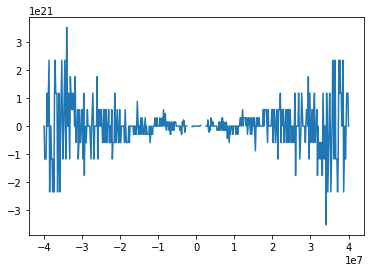

In [85]:
H_disc_diff_fun=sym.lambdify((delta2,delta3,omegam, omegao),H_disc_diff)
plt.plot(delta3vals, H_disc_diff_fun(delta2_ds3,delta3vals,omegamval,omegaoval))

NameError: name 'math' is not defined

/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


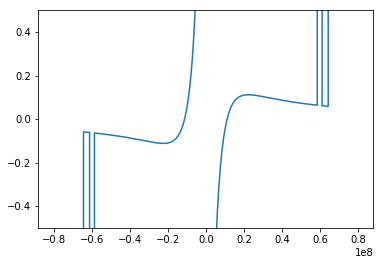

In [106]:
plt.plot(delta3vals, delta2_ds3-omegaoval**2/delta2vals)
plt.ylim([-5e-1,5e-1])

In [145]:
delta2_expr=(delta3-delta2/2)**2-1/4*(4*omegam**2+delta2**2)

In [147]:
sym.solve(delta2_expr,delta2)

/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


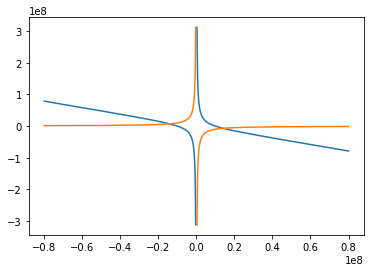

In [153]:
plt.plot(delta3vals,(1e7)**2/delta3vals-delta3vals)
plt.plot(delta3vals,-(1e7)**2/delta3vals)
